In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tsai.models.MINIROCKET import *
from tsai.basics import *
import sktime
import sklearn
Data = pd.read_csv('data/C_3471/C_3471tiao.csv')
train = Data.iloc[:,2:]
target = Data.iloc[:,1]
X_train,X_test, y_train, y_test = train_test_split(train,target,test_size = 0.2) #划分训练集和测试集（8:2）
X_train = np.array(X_train)
X_train = X_train.reshape(2776,1,4096)
X_test = np.array(X_test)
X_test = X_test.reshape(695,1,4096)
model = MiniRocketClassifier()
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
print(f'valid accuracy    : {model.score(X_test, y_test):.3%} time: {t}')

valid accuracy    : 100.000% time: 0:01:36.064242


In [21]:
from sktime.transformations.panel.rocket import MiniRocket
from sktime.transformations.panel.rocket import Rocket
rocket = Rocket()  # by default, ROCKET uses 10,000 kernels
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [22]:
X_train_transform.shape

(2776, 20000)

In [25]:
minirocket = MiniRocket()
minirocket.fit(X_train)
timer.start(False)
X_train_transform2 = minirocket.transform(X_train)
t = timer.stop()
print(f'shape   : {X_train_transform2.shape} time: {t}')

shape   : (2776, 9996) time: 0:01:20.479071


In [28]:
minirocket.fit(X_test)
timer.start(False)
X_test_transform2 = minirocket.transform(X_test)
t = timer.stop()
print(f'shape   : {X_test_transform2.shape} time: {t}')

shape   : (695, 9996) time: 0:00:20.415899


In [30]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score
X_train_transform2 = np.array(X_train_transform2)
X_train_transform2 = X_train_transform2.reshape(2776,1,9996)
X_test_transform2 = np.array(X_test_transform2)
X_test_transform2 = X_test_transform2.reshape(695,1,9996)
classifier = TimeSeriesForestClassifier()
timer.start(False)
classifier.fit(X_train_transform2, y_train)
t = timer.stop()
y_pred = classifier.predict(X_test_transform2)
accuracy=accuracy_score(y_test, y_pred)
print(f'accuracy   : {accuracy} time: {t}')

accuracy   : 0.9827338129496402 time: 0:19:08.126416


TCN网络

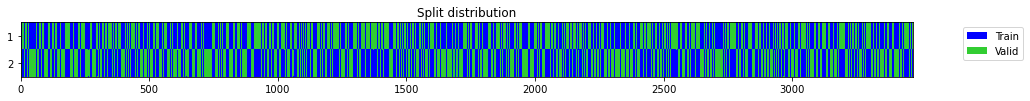

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:06


0:00:06.296587


In [70]:
from tsai.models.TCN import *
from fastai.metrics import accuracy
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
X=np.array(train).reshape(3471,1,4096)
get_splits(target,n_splits=2, valid_size=0.2)
y=np.array(target)
le = LabelEncoder()
y = le.fit_transform(y)
bs=16
tfms  = [None, [TSCategorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, num_workers=0, shuffle=False)
model = TCN(dls.vars, dls.c)
t = timer.start(False)
learn = Learner(dls, model,metrics=accuracy)
learn.fit_one_cycle(1, 3e-3)
t = timer.stop()
print(t)

FCN网络

In [72]:
from tsai.all import *
model2 = FCN(dls.vars, dls.c)
t = timer.start(False)
learn = Learner(dls, model2,metrics=accuracy)
learn.fit_one_cycle(1, 3e-3)
t = timer.stop()
print(t)

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:06


0:00:06.996599
